In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tushare as ts
%matplotlib inline

1. 一些简单的金融应用和分析

In [2]:
hs300 = ts.get_k_data('hs300','2015-01-01','2017-06-30')
hs300.set_index('date',inplace=True)
hs300.head()

,open,close,high,low,volume,code
date,,,,,,
2015-01-05,3566.09,3641.54,3669.04,3551.51,451198098.0,hs300
2015-01-06,3608.43,3641.06,3683.23,3587.23,420962185.0,hs300
2015-01-07,3620.92,3643.79,3671.19,3601.70,320191232.0,hs300
2015-01-08,3650.07,3559.26,3659.95,3552.10,295003045.0,hs300
2015-01-09,3547.57,3546.72,3689.75,3536.40,349982672.0,hs300


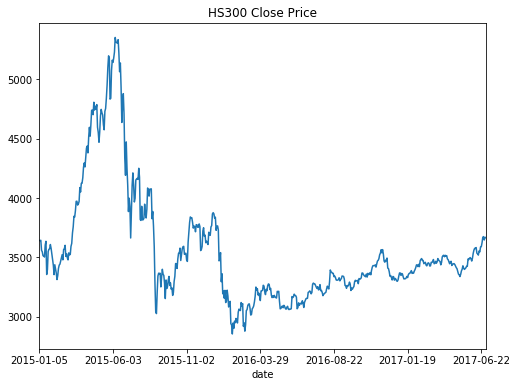

In [3]:
hs300.close.plot(figsize=(8,6),title='HS300 Close Price')

In [4]:
hs300['return'] = np.log(hs300.close/hs300['close'].shift(1)) #连续收益的计算方法；

In [5]:
hs300[['close','return']].tail()

,close,return
date,,
2017-06-26,3668.09,0.012402
2017-06-27,3674.72,0.001806
2017-06-28,3646.17,-0.007800
2017-06-29,3668.83,0.006196
2017-06-30,3666.80,-0.000553


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a0e19bd30>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1a16db5898>], dtype=object)

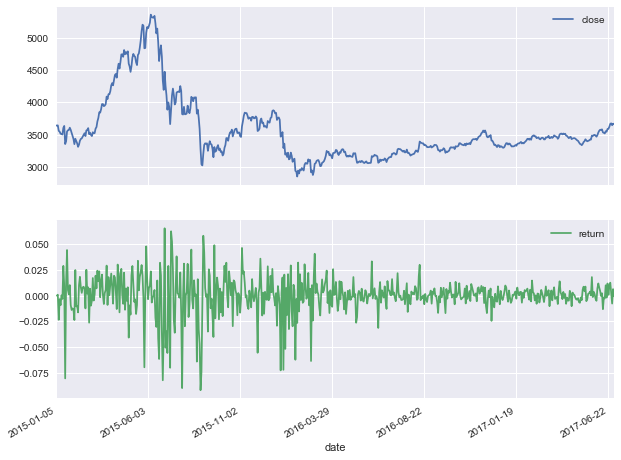

In [6]:
sns.set()
hs300[['close','return']].plot(subplots=True,figsize=(10,8))

In [7]:
# 计算股价的移动平均，必背；SMA策略；      .rolling(window=).mean()

hs300['SMA20'] = hs300['close'].rolling(window=20).mean()
hs300.head()

,open,close,high,low,volume,code,return,SMA20
date,,,,,,,,
2015-01-05,3566.09,3641.54,3669.04,3551.51,451198098.0,hs300,NaN,NaN
2015-01-06,3608.43,3641.06,3683.23,3587.23,420962185.0,hs300,-0.000132,NaN
2015-01-07,3620.92,3643.79,3671.19,3601.70,320191232.0,hs300,0.000750,NaN
2015-01-08,3650.07,3559.26,3659.95,3552.10,295003045.0,hs300,-0.023472,NaN
2015-01-09,3547.57,3546.72,3689.75,3536.40,349982672.0,hs300,-0.003529,NaN


In [8]:
# 用talib计算移动平均；talib：技术分析package；
import talib as ta

hs300['SMA20_ta'] = ta.SMA(np.asarray(hs300['close']),20)  #talib的数据结构有些指标只支持Ndarray格式；
hs300.head(21)

,open,close,high,low,volume,code,return,SMA20,SMA20_ta
date,,,,,,,,,
2015-01-05,3566.09,3641.54,3669.04,3551.51,451198098.0,hs300,NaN,NaN,NaN
2015-01-06,3608.43,3641.06,3683.23,3587.23,420962185.0,hs300,-0.000132,NaN,NaN
2015-01-07,3620.92,3643.79,3671.19,3601.70,320191232.0,hs300,0.000750,NaN,NaN
2015-01-08,3650.07,3559.26,3659.95,3552.10,295003045.0,hs300,-0.023472,NaN,NaN
2015-01-09,3547.57,3546.72,3689.75,3536.40,349982672.0,hs300,-0.003529,NaN,NaN
2015-01-12,3531.51,3513.58,3560.53,3461.32,266567175.0,hs300,-0.009388,NaN,NaN
2015-01-13,3506.45,3514.04,3550.16,3494.77,187153965.0,hs300,0.000131,NaN,NaN
2015-01-14,3522.91,3502.42,3547.24,3471.56,196012510.0,hs300,-0.003312,NaN,NaN
2015-01-15,3501.72,3604.12,3604.12,3482.27,237812338.0,hs300,0.028623,NaN,NaN


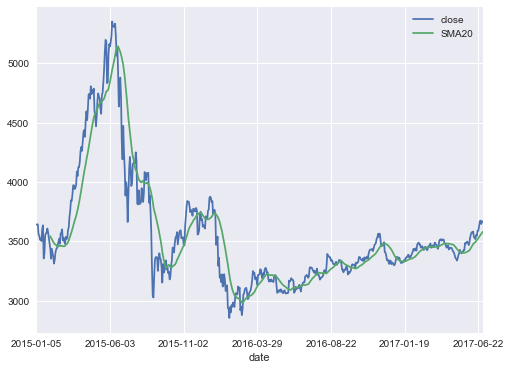

In [9]:
hs300[['close','SMA20']].plot(figsize=(8,6))

In [15]:
hs300['SMA60_ta'] = hs300['close'].rolling(window=60,min_periods=5).mean()
hs300.head(10)

,open,close,high,low,volume,code,return,SMA20,SMA20_ta,SMA60_ta
date,,,,,,,,,,
2015-01-05,3566.09,3641.54,3669.04,3551.51,451198098.0,hs300,NaN,NaN,NaN,NaN
2015-01-06,3608.43,3641.06,3683.23,3587.23,420962185.0,hs300,-0.000132,NaN,NaN,NaN
2015-01-07,3620.92,3643.79,3671.19,3601.70,320191232.0,hs300,0.000750,NaN,NaN,NaN
2015-01-08,3650.07,3559.26,3659.95,3552.10,295003045.0,hs300,-0.023472,NaN,NaN,NaN
2015-01-09,3547.57,3546.72,3689.75,3536.40,349982672.0,hs300,-0.003529,NaN,NaN,3606.474000
2015-01-12,3531.51,3513.58,3560.53,3461.32,266567175.0,hs300,-0.009388,NaN,NaN,3590.991667
2015-01-13,3506.45,3514.04,3550.16,3494.77,187153965.0,hs300,0.000131,NaN,NaN,3579.998571
2015-01-14,3522.91,3502.42,3547.24,3471.56,196012510.0,hs300,-0.003312,NaN,NaN,3570.301250
2015-01-15,3501.72,3604.12,3604.12,3482.27,237812338.0,hs300,0.028623,NaN,NaN,3574.058889


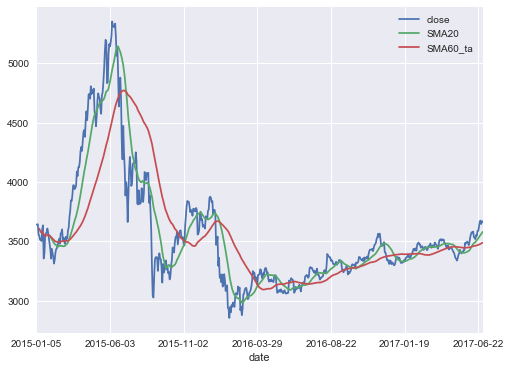

In [12]:
hs300[['close','SMA20','SMA60_ta']].plot(figsize=(8,6))

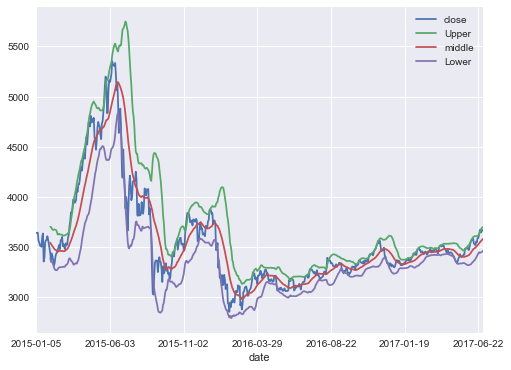

In [16]:
hs300['Upper'],hs300['middle'],hs300['Lower'] = ta.BBANDS(np.asarray(hs300.close),
                                                          timeperiod=20,nbdevup=2,nbdevdn=2,matype=0)
hs300[['close','Upper','middle','Lower']].plot(figsize=(8,6))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a17bd7630>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1a17bb5128>], dtype=object)

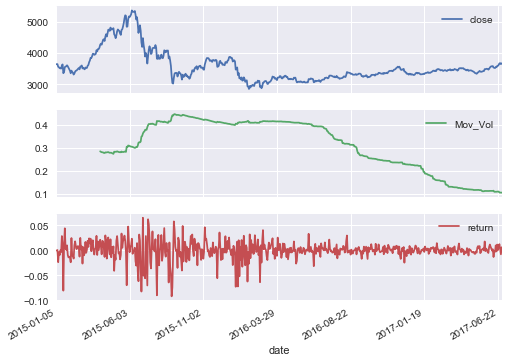

In [19]:
import math 
hs300["Mov_Vol"] = hs300['return'].rolling(window=252,min_periods=60).std()*np.sqrt(252)
hs300[['close','Mov_Vol','return']].plot(subplots=True,figsize=(8,6))

2.爬取Tushare数据并做选股条件分析

In [100]:
# 获取沪深300股票代码列表

hs300 = ts.get_hs300s()['code'].tolist()
hs300[:10]

['600000',
 '600004',
 '600009',
 '600010',
 '600011',
 '600015',
 '600016',
 '600018',
 '600019',
 '600023']

In [101]:
# 获取基本面数据
# rev: 收入同比（%）  profit：利润同比（%）  npr: 净利润率（%）

stock_basics = ts.get_stock_basics('2017-03-31')
stock_basics.head()

,name,industry,area,pe,outstanding,totals,totalAssets,liquidAssets,fixedAssets,reserved,...,bvps,pb,timeToMarket,undp,perundp,rev,profit,gpr,npr,holders
code,,,,,,,,,,,,,,,,,,,,,
300636,N同和,化学制药,江西,28.75,0.20,0.80,41896.05,21353.20,19087.25,12014.51,...,5.08,4.10,20170331,11218.73,1.40,-9.00,-7.77,38.71,23.19,36800
601200,N沪环境,环境保护,上海,44.25,3.11,7.03,1189158.50,170768.63,34481.62,43149.98,...,6.96,4.21,20170331,179192.31,2.55,0.00,0.00,34.73,18.23,98764
300635,N达安,建筑施工,广东,27.50,0.21,0.85,50438.46,49604.96,67.40,8595.96,...,5.41,3.30,20170331,17130.89,2.02,2.84,8.01,32.34,13.51,39795
002277,友阿股份,百货,湖南,36.74,11.32,14.17,1180913.25,516266.94,209564.75,197982.42,...,3.48,2.23,20090717,193383.30,1.37,0.78,-3.55,18.78,4.80,42973
601890,亚星锚链,船舶,江苏,146.50,9.59,9.59,382271.16,283281.94,62850.08,138463.20,...,3.05,3.23,20101228,52673.75,0.55,-25.92,-23.28,26.90,5.75,159550


In [102]:
stock_basics.reset_index(inplace=True)   #reset_index重置dataFrame的索引
stock_basics.head()

,code,name,industry,area,pe,outstanding,totals,totalAssets,liquidAssets,fixedAssets,...,bvps,pb,timeToMarket,undp,perundp,rev,profit,gpr,npr,holders
0,300636,N同和,化学制药,江西,28.75,0.20,0.80,41896.05,21353.20,19087.25,...,5.08,4.10,20170331,11218.73,1.40,-9.00,-7.77,38.71,23.19,36800
1,601200,N沪环境,环境保护,上海,44.25,3.11,7.03,1189158.50,170768.63,34481.62,...,6.96,4.21,20170331,179192.31,2.55,0.00,0.00,34.73,18.23,98764
2,300635,N达安,建筑施工,广东,27.50,0.21,0.85,50438.46,49604.96,67.40,...,5.41,3.30,20170331,17130.89,2.02,2.84,8.01,32.34,13.51,39795
3,002277,友阿股份,百货,湖南,36.74,11.32,14.17,1180913.25,516266.94,209564.75,...,3.48,2.23,20090717,193383.30,1.37,0.78,-3.55,18.78,4.80,42973
4,601890,亚星锚链,船舶,江苏,146.50,9.59,9.59,382271.16,283281.94,62850.08,...,3.05,3.23,20101228,52673.75,0.55,-25.92,-23.28,26.90,5.75,159550


In [103]:
#isin():数据过滤的方法；从stcok_basics这张大表格里面把hs300的这300只股票代码给挑选出来；

data1 = stock_basics.loc[stock_basics['code'].isin(hs300),
                         ['code', 'name', 'industry', 'pe', 'pb', 'esp','rev', 'profit']]
data1.columns = ['代码','名称', '行业', 'PE', 'PB', 'EPS', '收入%', '利润%']
data1.head()

,代码,名称,行业,PE,PB,EPS,收入%,利润%
14,603833,欧派家居,家居用品,41.96,12.44,2.288,27.23,94.39
34,600926,杭州银行,银行,13.28,1.54,1.282,0.00,0.00
39,601228,广州港,港口,36.83,2.19,0.108,15.27,-0.24
45,002466,天齐锂业,小金属,28.41,9.36,1.540,109.15,510.03
59,600487,亨通光电,通信设备,22.89,5.64,0.844,38.38,160.39


In [104]:
# 获取盈利能力数据

stock_profit = ts.get_profit_data(2017,1)
stock_profit.head()

[Getting data:]###########################################################

,code,name,roe,net_profit_ratio,gross_profit_rate,net_profits,eps,business_income,bips
0,600423,*ST柳化,215.12,10.30,-1.3970,40.6863,0.1018,394.6887,0.9883
1,600306,商业城,71.97,71.48,17.3030,171.9346,0.9651,240.5080,1.3501
2,000717,韶钢松山,26.83,3.19,6.2247,168.1588,0.0695,5268.7636,2.1776
3,600133,东湖高新,26.81,55.22,11.6396,686.8356,1.0828,1243.7266,1.9609
4,002893,华通热力,25.83,21.81,32.2225,112.7380,1.2526,516.6846,5.7409


In [105]:
data2 = stock_profit.loc[stock_profit['code'].isin(hs300),
                        ['code', 'roe', 'gross_profit_rate', 'net_profit_ratio']]
data2.columns = ['代码', 'ROE', '毛利率', '净利率']
data2 = data2.round(2)
data2.head()

,代码,ROE,毛利率,净利率
19,002027,12.20,67.60,45.72
22,600309,11.26,39.23,19.94
26,002714,10.72,40.47,34.55
34,300136,9.58,29.69,28.43
36,002304,9.52,61.23,36.14


In [106]:
# 获取成长能力数据
# nprg:净利润增长率（%）  nav:净资产增长率

stock_growth = ts.get_growth_data(2017,1)
stock_growth.head()

[Getting data:]#######################################################

,code,name,mbrg,nprg,nav,targ,epsg,seg
0,000011,深物业A,429.7262,52167.6290,29.1054,18.8559,50510.0000,29.1174
1,002352,顺丰控股,10983.4398,22009.0595,2905.1161,5119.4014,500.0000,2899.2541
2,000822,山东海化,83.5382,15426.0937,6.6646,11.9622,13990.9091,6.6647
3,000023,深天地A,28.6215,14473.3382,4.0285,2.3630,-2630.0000,3.6926
4,000517,荣安地产,1139.7346,13199.2432,11.0213,12.7704,13600.0000,11.0213


In [107]:
data3 = stock_growth.loc[stock_growth['code'].isin(hs300),['code', 'nprg']]
data3.columns = ['代码', 'NI%']
data3 = data3.round(2)
data3.head()

,代码,NI%
1,002352,22009.06
7,000408,10539.82
20,601225,3805.27
28,002601,3002.91
33,000725,2443.31


In [108]:
from functools import reduce
# 数据合并
func = lambda x,y:pd.merge(x,y,on='代码',how='left')
data = reduce(func,[data1,data2,data3])

In [109]:
sum(data.duplicated())

10

In [110]:
data = data.drop_duplicates()
data.head()

,代码,名称,行业,PE,PB,EPS,收入%,利润%,ROE,毛利率,净利率,NI%
0,603833,欧派家居,家居用品,41.96,12.44,2.288,27.23,94.39,1.12,31.00,3.83,32.89
1,600926,杭州银行,银行,13.28,1.54,1.282,0.00,0.00,3.29,47.15,40.26,7.75
2,601228,广州港,港口,36.83,2.19,0.108,15.27,-0.24,1.39,25.38,8.88,30.18
3,002466,天齐锂业,小金属,28.41,9.36,1.540,109.15,510.03,7.73,68.79,38.15,47.77
4,600487,亨通光电,通信设备,22.89,5.64,0.844,38.38,160.39,4.50,21.79,6.06,138.42


In [111]:
data['估值系数'] = data.PE*data.PB
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287 entries, 0 to 296
Data columns (total 13 columns):
代码      287 non-null object
名称      287 non-null object
行业      287 non-null object
PE      287 non-null float64
PB      287 non-null float64
EPS     287 non-null float64
收入%     287 non-null float64
利润%     287 non-null float64
ROE     283 non-null float64
毛利率     283 non-null float64
净利率     283 non-null float64
NI%     262 non-null float64
估值系数    287 non-null float64
dtypes: float64(10), object(3)
memory usage: 31.4+ KB


In [112]:
#条件选股；
stock_select = data.loc[(data['估值系数']<60)&(data['ROE']>5),
                       ['代码', '名称', 'PE', 'PB', '估值系数', 'ROE', '收入%']]
stock_select.head()

,代码,名称,PE,PB,估值系数,ROE,收入%
21,000651,格力电器,12.74,3.83,48.7942,6.93,1.11
51,600690,青岛海尔,14.57,2.96,43.1272,6.13,18.78
60,000625,长安汽车,7.34,1.88,13.7992,5.22,11.43
123,601318,中国平安,10.84,1.76,19.0784,5.60,14.91
147,000333,美的集团,12.53,3.66,45.8598,6.64,4.49


In [113]:
print('共筛选出%i只股票'%len(stock_select))

共筛选出9只股票


In [116]:
# 按选定字段对数据进行排序
stock_select.sort_values('估值系数',ascending=True,inplace=True)
stock_select

,代码,名称,PE,PB,估值系数,ROE,收入%
222,600177,雅戈尔,8.08,1.57,12.6856,5.47,-14.95
60,000625,长安汽车,7.34,1.88,13.7992,5.22,11.43
123,601318,中国平安,10.84,1.76,19.0784,5.60,14.91
289,600115,东方航空,11.14,1.97,21.9458,5.62,4.79
186,600688,上海石化,11.61,2.79,32.3919,7.22,-3.60
224,600340,华夏幸福,12.41,3.18,39.4638,5.64,40.40
51,600690,青岛海尔,14.57,2.96,43.1272,6.13,18.78
147,000333,美的集团,12.53,3.66,45.8598,6.64,4.49
21,000651,格力电器,12.74,3.83,48.7942,6.93,1.11


In [ ]:
'''axis : {0 or 'index', 1 or 'columns'}, default 0
    * 0 or 'index': apply function to each column
    * 1 or 'columns': apply function to each row'''

In [117]:
# 数据分类

def map_func(x):
    
    if x['ROE']>5:
        return '高成长'
    elif x['ROE']>=0:
        return '低成长'
    else:
        return '亏损'
    
data['成长性'] = data.apply(map_func,axis=1)
data.tail(10)

,代码,名称,行业,PE,PB,EPS,收入%,利润%,ROE,毛利率,净利率,NI%,估值系数,成长性
287,002153,石基信息,软件服务,65.28,4.75,0.248,21.05,12.37,1.24,45.39,11.44,2.68,310.0800,低成长
288,002146,荣盛发展,全国地产,13.08,1.75,0.500,25.31,29.91,1.89,31.28,8.96,48.56,22.8900,低成长
289,600115,东方航空,空运,11.14,1.97,0.490,4.79,25.50,5.62,12.44,11.48,5.40,21.9458,高成长
290,601390,中国中铁,建筑施工,16.33,1.46,0.390,2.69,16.91,1.81,8.91,1.95,19.36,23.8418,低成长
291,002271,东方雨虹,其他建材,24.53,5.11,0.870,32.09,55.30,1.54,40.27,5.25,40.76,125.3483,低成长
292,601992,金隅股份,水泥,18.52,1.13,0.252,16.65,33.17,0.98,26.42,3.88,-26.41,20.9276,低成长
293,601021,春秋航空,空运,17.83,3.69,1.461,3.69,-2.72,3.97,12.48,11.79,-17.30,65.7927,低成长
294,601018,宁波港,港口,31.46,2.09,0.175,-2.03,-12.99,1.93,29.86,17.86,2.02,65.7514,低成长
295,603986,兆易创新,半导体,108.97,16.99,1.860,0.00,0.00,5.16,29.76,15.36,89.90,1851.4003,高成长
296,601212,白银有色,铜,301.59,7.10,0.032,0.00,0.00,0.19,8.01,0.42,51.37,2141.2890,低成长


In [118]:
# 对高成长分类按照‘烟蒂系数’做升序排列
# 选择具体的某一列，按照一定的顺序进行呈现；

data_growth = data.loc[data['成长性']=='高成长'].sort_values('估值系数',ascending=True)
data_growth.head()

,代码,名称,行业,PE,PB,EPS,收入%,利润%,ROE,毛利率,净利率,NI%,估值系数,成长性
222,600177,雅戈尔,服饰,8.08,1.57,1.370,-14.95,1.64,5.47,46.77,37.17,-50.95,12.6856,高成长
60,000625,长安汽车,汽车整车,7.34,1.88,1.660,11.43,14.81,5.22,15.15,13.59,-10.13,13.7992,高成长
123,601318,中国平安,保险,10.84,1.76,3.500,14.91,15.11,5.60,12.29,8.67,10.05,19.0784,高成长
289,600115,东方航空,空运,11.14,1.97,0.490,4.79,25.50,5.62,12.44,11.48,5.40,21.9458,高成长
186,600688,上海石化,石油加工,11.61,2.79,0.551,-3.60,83.48,7.22,28.62,8.54,67.48,32.3919,高成长


In [119]:
data_profit = data[data['成长性']=='高成长'].sort_values('ROE',ascending=False)
data_profit.head()

,代码,名称,行业,PE,PB,EPS,收入%,利润%,ROE,毛利率,净利率,NI%,估值系数,成长性
25,002027,分众传媒,软件服务,25.34,15.95,0.370,18.80,26.49,12.20,67.60,45.72,71.73,404.1730,高成长
50,600309,万华化学,化工原料,18.53,4.30,1.097,41.55,74.14,11.26,39.23,19.94,375.02,79.6790,高成长
279,002714,牧原股份,农业综合,11.97,5.51,1.704,100.40,531.52,10.72,40.47,34.55,84.81,65.9547,高成长
24,300136,信维通信,通信设备,72.94,19.05,0.353,66.45,146.91,9.58,29.69,28.43,180.20,1389.5070,高成长
128,002304,洋河股份,白酒,20.41,5.25,3.211,7.36,8.47,9.52,61.23,36.14,11.46,107.1525,高成长


In [120]:
def group_func(x):
    
    return x.sort_values('估值系数',ascending=True)[:5]
data_grouped = data.groupby('成长性').apply(group_func)
data_grouped

代码    名称    行业     PE    PB    EPS    收入%      利润%   ROE    毛利率  \
成长性                                                                            
亏损  17   300142  沃森生物  生物制药   0.00  8.79 -0.170 -44.10  -109.19 -0.92  55.84   
    110  601808  中海油服  石油开采   0.00  1.71 -2.401 -35.94 -1166.78 -1.57  -5.01   
    242  600100  同方股份  电脑设备   5.95  1.78  1.720  -4.44   799.41 -1.26  15.25   
    237  601111  中国国航    空运  12.50  1.62  0.590   3.72    15.07   NaN    NaN   
    175  600030  中信证券    证券  18.83  1.37  0.855 -32.16   -47.65   NaN    NaN   
低成长 267  000157  中联重科  工程机械   0.00  0.98 -0.105  -5.69   -54.82  0.22  26.60   
    273  601919  中远海控    水运   0.00  3.26 -0.902   0.35 -2962.23  1.43   7.69   
    230  000063  中兴通讯  通信设备   0.00  2.69 -0.570   1.04  -173.49  3.31  32.20   
    95   002024  苏宁云商  电器连锁   0.00  1.57 -0.040  11.00  -672.42  0.11  16.08   
    11   601991  大唐发电  火力发电   0.00  1.65 -0.197  -4.47  -193.39  1.56  14.19   
高成长 222  600177   雅戈尔    服饰   8.08  1.57  1.370 -14.95     1.64  5.47  46.77   
    60   000625  长安汽车  汽车整车   7.34  1.88  1.660  11.43    14.81  5.22  15.15   
    123  601318  中国平安    保险  10.84  1.76  3.500  14.91    15.11  5.60  12.29   
    289  600115  东方航空    空运  11.14  1.97  0.490   4.79    25.50  5.62  12.44   
    186  600688  上海石化  石油加工  11.61  2.79  0.551  -3.60    83.48  7.22  28.62   

           净利率     NI%     估值系数  成长性  
成长性                                   
亏损  17  -34.00     NaN   0.0000   亏损  
    110 -17.81     NaN   0.0000   亏损  
    242  -6.65 -105.62  10.5910   亏损  
    237    NaN  -37.24  20.2500   亏损  
    175    NaN   35.81  25.7971   亏损  
低成长 267   1.60     NaN   0.0000  低成长  
    273   1.34     NaN   0.0000  低成长  
    230   4.71   24.15   0.0000  低成长  
    95    0.20     NaN   0.0000  低成长  
    11    4.12   24.57   0.0000  低成长  
高成长 222  37.17  -50.95  12.6856  高成长  
    60   13.59  -10.13  13.7992  高成长  
    123   8.67   10.05  19.0784  高成长  
    289  11.48    5.40  21.9458  高成长  
    186   8.54   67.48  32.3919  高成长

In [121]:
data_indus = data.groupby('行业').apply(group_func)
data_indus

代码     名称    行业       PE     PB    EPS    收入%      利润%   ROE  \
行业                                                                           
专用机械 148  300024    机器人  专用机械    82.08   6.06  0.263  20.65     4.04  1.03   
中成药  121  600332    白云山   中成药    30.69   2.67  1.080   4.76    15.97  2.71   
     171  600518   康美药业   中成药    27.00   3.27  0.560  22.30    22.98  3.54   
     22   000423   东阿阿胶   中成药    23.16   5.13  2.832  15.92    14.00  6.74   
     140  603858   步长制药   中成药    34.07   4.78  2.860   5.71   -49.97  1.73   
     199  000538   云南白药   中成药    28.17   5.84  2.266  10.89    10.16  4.40   
乳制品  67   600887   伊利股份   乳制品    19.64   5.30  0.722   0.98    20.69  6.98   
互联网  162  300059   东方财富   互联网    74.68   4.16  0.210 -58.88   -61.39  0.77   
     40   002555   三七互娱   互联网    40.46   9.57  0.513  12.69   111.49  8.73   
仓储物流 189  600233   圆通速递  仓储物流    49.85   8.27  0.430  43.53    90.74  3.29   
     223  002352   顺丰控股  仓储物流    55.80  11.37  1.060  19.50   279.55  3.62   
     36   002120   韵达股份  仓储物流   580.04  15.47  0.061   8.71    63.84  6.95   
     84   002468   申通快递  仓储物流  6254.48  12.90  0.003   2.77     5.38  5.59   
保险   123  601318   中国平安    保险    10.84   1.76  3.500  14.91    15.11  5.60   
     73   601601   中国太保    保险    20.61   1.89  1.331   8.01   -31.99  1.50   
     141  601336   新华保险    保险    26.63   2.23  1.584  -7.75   -42.54  2.98   
     75   000627   天茂集团    保险    28.65   2.39  0.210  -9.33  1610.35  0.79   
     46   601628   中国人寿    保险    37.39   2.36  0.660   7.51   -44.88  1.98   
元器件  194  000413   东旭光电   元器件    45.18   2.52  0.290  48.41    -6.51  1.73   
     52   002241   歌尔股份   元器件    31.47   4.79  1.082  41.24    32.00  2.66   
     149  002179   中航光电   元器件    31.42   5.56  1.206  23.91    29.10  4.27   
     216  300408   三环集团   元器件    33.38   7.10  0.445  15.56    20.70  4.34   
     14   002475   立讯精密   元器件    59.10   4.46  0.321  20.49     4.30  2.60   
全国地产 55   000402  金 融 街  全国地产    11.81   1.19  0.938  27.55    24.46  1.90   
     154  600048   保利地产  全国地产    11.92   1.34  0.640  37.45     9.90  2.07   
     218  600606   绿地控股  全国地产    12.29   1.72  0.486  10.55    19.76  4.52   
     176  000002   万 科Ａ  全国地产    10.81   2.00  1.904  22.98    16.02  0.61   
     288  002146   荣盛发展  全国地产    13.08   1.75  0.500  25.31    29.91  1.89   
其他建材 142  000786   北新建材  其他建材    18.92   2.14  0.790   8.01    30.57  1.42   
     291  002271   东方雨虹  其他建材    24.53   5.11  0.870  32.09    55.30  1.54   
...          ...    ...   ...      ...    ...    ...    ...      ...   ...   
软件服务 59   002065   东华软件  软件服务    39.66   3.92  0.402  15.17     5.00  5.22   
     212  000938   紫光股份  软件服务    85.57   2.49  0.770  93.26   346.90  1.31   
     287  002153   石基信息  软件服务    65.28   4.75  0.248  21.05    12.37  1.24   
     280  300033    同花顺  软件服务    28.11  11.53  2.254  20.23    26.57  3.96   
运输设备 254  601766   中国中车  运输设备    26.02   2.67  0.410  -5.04    -4.42  0.97   
通信设备 230  000063   中兴通讯  通信设备     0.00   2.69 -0.570   1.04  -173.49  3.31   
     114  600522   中天科技  通信设备    23.68   2.66  0.373  27.03    73.52  2.68   
     4    600487   亨通光电  通信设备    22.89   5.64  0.844  38.38   160.39  4.50   
     106  600498   烽火通信  通信设备    36.44   3.68  0.507  29.81    20.03  1.86   
     24   300136   信维通信  通信设备    72.94  19.05  0.353  66.45   146.91  9.58   
铁路   38   601006   大秦铁路    铁路    16.40   1.29  0.346 -21.82   -54.01  3.39   
     240  601333   广深铁路    铁路    31.80   1.31  0.164   9.89     8.16  0.99   
铜    116  600362   江西铜业     铜    75.85   1.28  0.227   8.90    23.59  1.14   
     168  000630   铜陵有色     铜   262.98   2.17  0.009  -4.92   -47.67  0.85   
     296  601212   白银有色     铜   301.59   7.10  0.032   0.00     0.00  0.19   
铝    170  600219   南山铝业     铝    49.16   0.97  0.160  -4.54   -14.75  0.89   
     61   601600   中国铝业     铝   172.18   1.82  0.020  16.68   170.82  1.01   
银行   93   601988   中国银行    银行     6.06   0.84  0.440   3.45     2.48  3.21   
     139  601166   兴业银行    银行     5.